Available Files: {'sustainable_energy': ['global-data-on-sustainable-energy (1).csv'], 'coal_production': ['Indian Coal Mines Dataset_January 2021-1.csv'], 'coal_dust': ['TEST_5_005.csv'], 'greenhouse_gas': ['climate-change.csv', 'temperature-anomaly.csv', 'annual-co-emissions-by-region.csv', 'net-zero-targets.csv', 'co2-emissions-and-gdp.csv', 'net-zero-target-set.csv']}

Energy Data Preview:
        Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4           

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan


Merged Data Preview:
   index  SL No. State/UT Name      District Name         Mine Name  \
0      0       1   West Bengal  Paschim Bardhaman  Ningah Colliery    
1      0       1   West Bengal  Paschim Bardhaman  Ningah Colliery    
2      0       1   West Bengal  Paschim Bardhaman  Ningah Colliery    
3      0       1   West Bengal  Paschim Bardhaman  Ningah Colliery    
4      0       1   West Bengal  Paschim Bardhaman  Ningah Colliery    

   Coal Production (MT) Coal Mine Owner Name   Coal Mine Owner Full Name  \
0                  0.01                  ECL  Eastern Coalfields Limited   
1                  0.01                  ECL  Eastern Coalfields Limited   
2                  0.01                  ECL  Eastern Coalfields Limited   
3                  0.01                  ECL  Eastern Coalfields Limited   
4                  0.01                  ECL  Eastern Coalfields Limited   

  Coal/Lignite Govt Owned/Private  ... gdp_growth  gdp_per_capita  \
0         Coal           

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


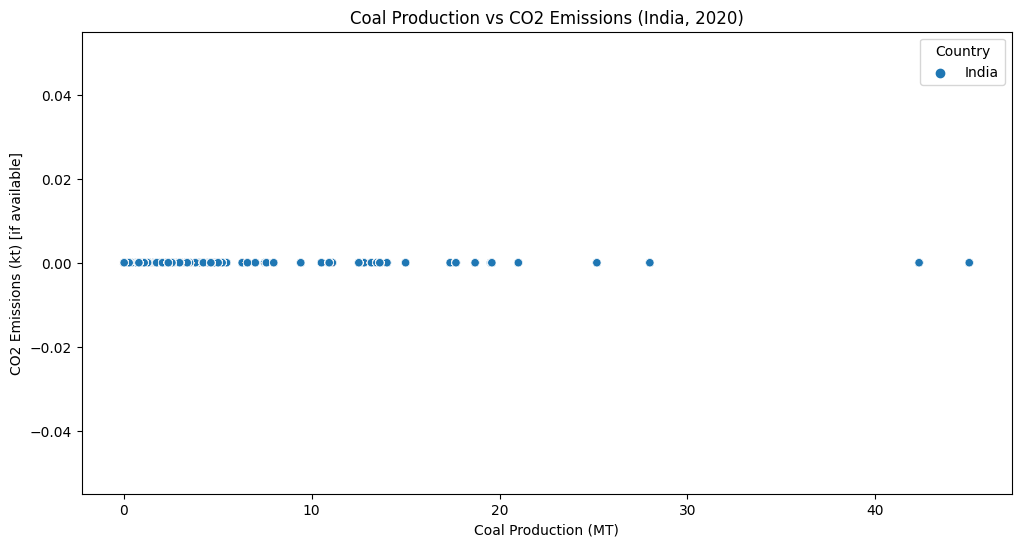

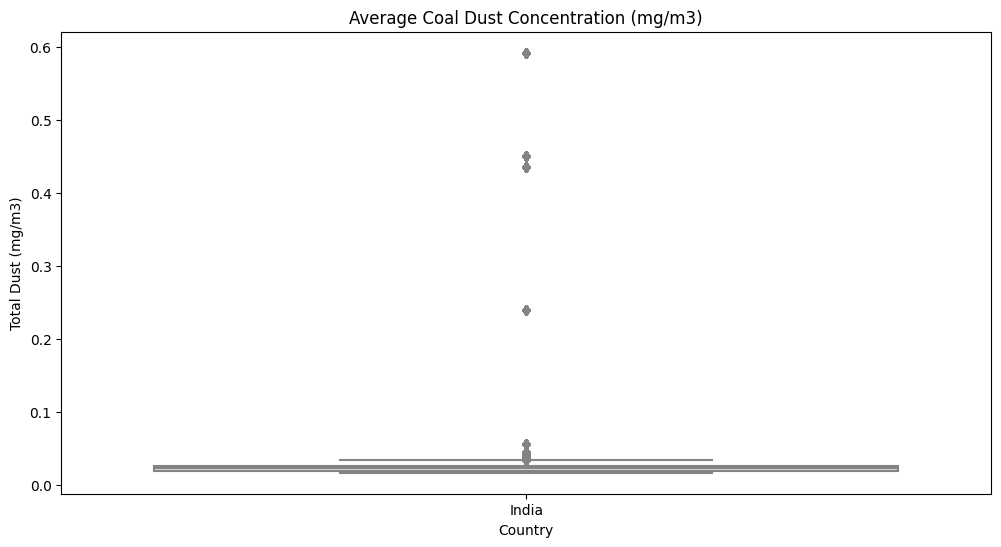

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


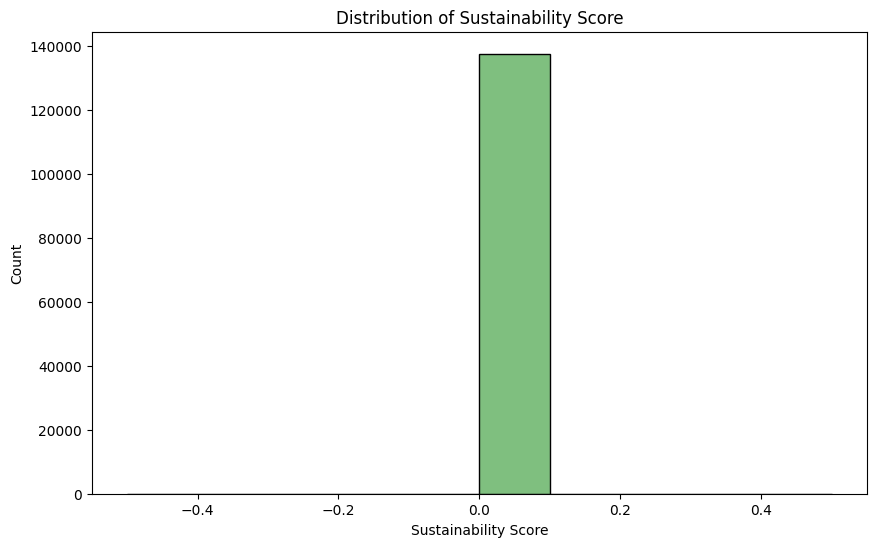


CO2 Emissions target not available for regression.

Classification Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27540

    accuracy                           1.00     27540
   macro avg       1.00      1.00      1.00     27540
weighted avg       1.00      1.00      1.00     27540



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


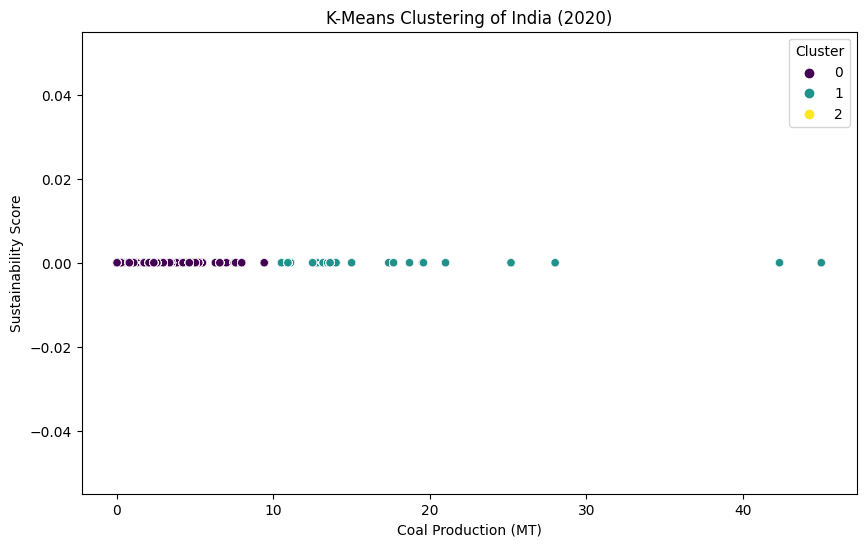


CO2 Emissions target not available for deep learning regression.

Final merged dataset saved as 'cleaned_sustainability_data.csv'


In [13]:
# -------------------------
# 1. Import Libraries
# -------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# -------------------------
# 2. Define Dataset Paths
# -------------------------
datasets = {
    "sustainable_energy": "/kaggle/input/global-data-on-sustainable-energy",
    "coal_production": "/kaggle/input/indias-top-coal-producing-states-a-state-by-stat",
    "coal_dust": "/kaggle/input/coal-dust-concentration",
    "greenhouse_gas": "/kaggle/input/co-and-greenhouse-gas-emissions"
}

# List available files in each folder
files = {key: os.listdir(path) for key, path in datasets.items()}
print("Available Files:", files)

# -------------------------
# 3. Load Datasets
# -------------------------
# Global Sustainable Energy Data
# (Assume the file "global-data-on-sustainable-energy (1).csv" is our target)
df_energy = pd.read_csv(f"{datasets['sustainable_energy']}/{files['sustainable_energy'][0]}")
print("\nEnergy Data Preview:")
print(df_energy.head())

# Indian Coal Production Data
df_coal = pd.read_csv(f"{datasets['coal_production']}/{files['coal_production'][0]}")
print("\nCoal Production Data Preview:")
print(df_coal.head())

# Coal Dust Concentration Data
df_dust = pd.read_csv(f"{datasets['coal_dust']}/{files['coal_dust'][0]}")
print("\nCoal Dust Data Preview:")
print(df_dust.head())

# Greenhouse Gas / CO2 Emissions Data
# We select the file "co2-emissions-and-gdp.csv" (if available)
# If not, you may choose another appropriate file.
emissions_file = "co2-emissions-and-gdp.csv"
df_emissions = pd.read_csv(f"{datasets['greenhouse_gas']}/{emissions_file}")
print("\nCO2 Emissions Data Preview:")
print(df_emissions.head())

# -------------------------
# 4. Preprocessing & Harmonizing Datasets
# -------------------------
# For consistency, we need a common key. We will use "Country" and "Year".
# The energy and emissions datasets have an "Entity" column; we rename it to "Country".
df_energy.rename(columns={"Entity": "Country"}, inplace=True)
df_emissions.rename(columns={"Entity": "Country"}, inplace=True)

# Filter global datasets for India and Year == 2020.
df_energy_india = df_energy[(df_energy["Country"]=="India") & (df_energy["Year"]==2020)]
df_emissions_india = df_emissions[(df_emissions["Country"]=="India") & (df_emissions["Year"]==2020)]

# Check if the necessary columns are present in the datasets
required_columns = ["Renewable energy share in the total final energy consumption (%)", "Electricity from renewables (TWh)", "Value_co2_emissions_kt_by_country"]
missing_columns = [col for col in required_columns if col not in df_energy_india.columns and col not in df_emissions_india.columns]

if missing_columns:
    print(f"Warning: Missing columns in the datasets - {missing_columns}")
else:
    print("All required columns are present.")

# For the Indian coal production dataset, add "Country" and "Year" columns.
df_coal["Country"] = "India"
df_coal["Year"] = 2020
df_coal.rename(columns={"Coal/ Lignite Production (MT) (2019-2020)": "Coal Production (MT)"}, inplace=True)

# For the coal dust dataset, we assume the data is from an Indian coal mine.
df_dust["Country"] = "India"
df_dust["Year"] = 2020
df_dust.rename(columns={"TOTAL [mg/m3]": "Total Dust (mg/m3)"}, inplace=True)
df_dust.drop(columns=["Alarms", "Errors"], inplace=True, errors="ignore")

# -------------------------
# 5. Merge the Datasets
# -------------------------
# We'll merge on "Country" and "Year". First, merge coal production and dust.
merged_df = pd.merge(df_coal, df_dust, on=["Country", "Year"], how="left")
# Merge with sustainable energy data (for India, 2020)
merged_df = pd.merge(merged_df, df_energy_india, on=["Country", "Year"], how="left")
# Merge with CO2 emissions data (for India, 2020)
merged_df = pd.merge(merged_df, df_emissions_india, on=["Country", "Year"], how="left")

print("\nMerged Data Preview:")
print(merged_df.head())

# -------------------------
# 6. Feature Engineering (Updated)
# -------------------------
# Create a Sustainability Score. If renewable energy share column is missing, fallback to other features.
if "Renewable energy share in the total final energy consumption (%)" in merged_df.columns:
    merged_df["Sustainability Score"] = (merged_df["Renewable energy share in the total final energy consumption (%)"]) / (
        merged_df["Coal Production (MT)"] * merged_df.get("Value_co2_emissions_kt_by_country", 1)
    )
else:
    # Fallback approach
    merged_df["Sustainability Score"] = merged_df.get("Electricity from renewables (TWh)", 0) / (merged_df["Coal Production (MT)"]+1)

# Fill any missing values
merged_df.fillna(0, inplace=True)

print("\nMerged Data with Sustainability Score:")
print(merged_df.head())

# -------------------------
# 7. Exploratory Data Analysis (Updated)
# -------------------------
plt.figure(figsize=(12,6))
sns.scatterplot(x=merged_df["Coal Production (MT)"], y=merged_df.get("Value_co2_emissions_kt_by_country", np.nan), hue=merged_df["Country"])
plt.xlabel("Coal Production (MT)")
plt.ylabel("CO2 Emissions (kt) [if available]")
plt.title("Coal Production vs CO2 Emissions (India, 2020)")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x="Country", y="Total Dust (mg/m3)", data=merged_df, palette="coolwarm")
plt.title("Average Coal Dust Concentration (mg/m3)")
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(merged_df["Sustainability Score"], bins=10, kde=True, color="green")
plt.xlabel("Sustainability Score")
plt.title("Distribution of Sustainability Score")
plt.show()

# -------------------------
# 8. Machine Learning Models
# -------------------------
# --- 8.1 Linear Regression Model ---
# Check if target column exists
target_col = "Value_co2_emissions_kt_by_country"
if target_col in merged_df.columns and merged_df[target_col].sum() > 0:
    X_reg = merged_df[["Coal Production (MT)", "Total Dust (mg/m3)"]]
    y_reg = merged_df[target_col]
    
    X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
    reg_model = LinearRegression()
    reg_model.fit(X_train, y_train)
    y_pred = reg_model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("\nLinear Regression RMSE:", rmse)
else:
    print("\nCO2 Emissions target not available for regression.")

# --- 8.2 Random Forest Classification ---
# Handle missing data for classification and create Sustainability Class based on Sustainability Score
median_score = merged_df["Sustainability Score"].median()
merged_df["Sustainability Class"] = np.where(merged_df["Sustainability Score"] > median_score, 1, 0)

X_class = merged_df[["Coal Production (MT)", "Total Dust (mg/m3)", "Sustainability Score"]]
y_class = merged_df["Sustainability Class"]

X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred_class = clf.predict(X_test)

print("\nClassification Accuracy:", accuracy_score(y_test, y_pred_class))
print("\nClassification Report:\n", classification_report(y_test, y_pred_class))

# --- 8.3 K-Means Clustering ---
# Scale the features before clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(merged_df[["Coal Production (MT)", "Total Dust (mg/m3)", "Sustainability Score"]])

kmeans = KMeans(n_clusters=3, random_state=42)
merged_df["Cluster"] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=merged_df["Coal Production (MT)"], y=merged_df["Sustainability Score"], hue=merged_df["Cluster"], palette="viridis")
plt.xlabel("Coal Production (MT)")
plt.ylabel("Sustainability Score")
plt.title("K-Means Clustering of India (2020)")
plt.show()

# -------------------------
# 9. Deep Learning Model for Regression
# -------------------------
# Check if target column exists for regression
if target_col in merged_df.columns and merged_df[target_col].sum() > 0:
    X_dl = merged_df[["Coal Production (MT)", "Total Dust (mg/m3)"]]
    y_dl = merged_df[target_col]
    
    X_train, X_test, y_train, y_test = train_test_split(X_dl, y_dl, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Build Neural Network Model
    model = Sequential([
        Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
        Dropout(0.2),
        Dense(64, activation="relu"),
        Dense(1)  # Output layer for regression
    ])
    
    model.compile(optimizer="adam", loss="mse")
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_test), verbose=0)
    
    y_pred_dl = model.predict(X_test_scaled)
    rmse_dl = np.sqrt(mean_squared_error(y_test, y_pred_dl))
    print("\nDeep Learning Model RMSE:", rmse_dl)
else:
    print("\nCO2 Emissions target not available for deep learning regression.")

# -------------------------
# 10. Save Final Merged & Processed Dataset
# -------------------------
merged_df.to_csv("/kaggle/working/cleaned_sustainability_data.csv", index=False)
print("\nFinal merged dataset saved as 'cleaned_sustainability_data.csv'")
